In [11]:
%matplotlib inline
%tb

import time
import numpy as np
import csv, sys, sklearn, sklearn.linear_model
import matplotlib.pyplot as plt

x_size = 5000
A = np.random.normal(scale=1,size=(2*x_size,x_size))
x_true = np.zeros(x_size)
x_true[np.random.choice(x_size, 100, replace=False)] = np.random.normal(scale=1,
                                                                        size=x_size)
# z = np.random.normal(scale=.1,size=2*x_size)
y = np.dot(A,x_true) # + z
# x_0 = np.random.normal(scale=1,size=x_size)


enet = sklearn.linear_model.Lasso(alpha=.05, max_iter=10000, fit_intercept=False)

start = time.time()
enet.fit(A, y)
end = time.time()

print end - start,'sec'

print np.sum(np.sign(np.abs(enet.coef_)))
print enet.n_iter_

enet = sklearn.linear_model.ElasticNet(alpha=.05, max_iter=10000, l1_ratio=.95, 
                                       fit_intercept=False)

start = time.time()
enet.fit(A, y)
end = time.time()

print end - start,'sec'

print np.sum(np.sign(np.abs(enet.coef_)))
print enet.n_iter_


SystemExit: 0

/Users/mich/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.


7.06962800026 sec
94.0
6
4.67327904701 sec
94.0
6
3.55157399178 sec
3180.0
14
2.92682409286 sec
55.0
5
2.72161483765 sec
2275.0
7


In [3]:
%matplotlib inline

import numpy as np
import csv, sys, sklearn, sklearn.linear_model
import matplotlib.pyplot as plt

with open('/Users/mich/OBDA/dorothea/dorothea_train.data.txt', 'rb') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ')

    A_list = list()
    count_row=0
    max_width = 0
    for row in csvreader:
        count_item=0
        A_list.append(list())
        for item in row:
            if item.strip() != '':
                A_list[count_row].append(float(item.strip()))
            count_item += 1
        
        if len(A_list[count_row]) > max_width:
            max_width = len(A_list[count_row])
            
        count_row += 1

    X_train = np.zeros((len(A_list),max_width))
    
    for i in range(len(A_list)):
        X_train[i,:len(A_list[i])] = np.asarray(A_list[i], dtype=np.float)

with open('/Users/mich/OBDA/dorothea/dorothea_valid.data.txt', 'rb') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ')

    A_list = list()
    count_row=0
    for row in csvreader:
        count_item=0
        A_list.append(list())
        for item in row:
            if item.strip() != '':
                A_list[count_row].append(float(item.strip()))
            count_item += 1
                    
        count_row += 1

    X_test = np.zeros((len(A_list),max_width))
    
    for i in range(len(A_list)):
        X_test[i,:len(A_list[i])] = np.asarray(A_list[i], dtype=np.float)

with open('/Users/mich/OBDA/dorothea/dorothea_train.labels.txt', 'rb') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ')

    y_train = list()
    for row in csvreader:
        if row[0].strip() != '':
            y_train.append(float(row[0].strip()))
    y_train = np.asarray(y_train, dtype=np.float)
    
with open('/Users/mich/OBDA/dorothea/dorothea_valid.labels.txt', 'rb') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ')

    y_test = list()
    for row in csvreader:
        if row[0].strip() != '':
            y_test.append(float(row[0].strip()))
    y_test = np.asarray(y_test, dtype=np.float)


[0] [0.77997648622288751]
[0] [-0.87560979830234298]


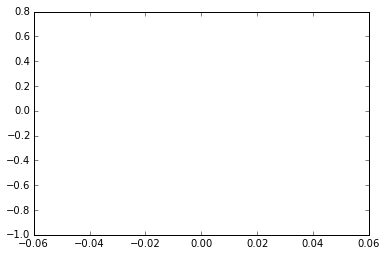

In [4]:
enet = sklearn.linear_model.ElasticNet(max_iter=10000, l1_ratio=.95)
enet.fit(X_train, y_train)
train_errors = list()
test_errors = list()
train_errors.append(enet.score(X_train, y_train))
test_errors.append(enet.score(X_test, y_test))

plt.plot(range(len(train_errors)), train_errors, range(len(test_errors)), test_errors)
print range(len(train_errors)), train_errors
print range(len(test_errors)), test_errors

[0] [0.87769726841625562]
[0] [-1.7394536770881768]


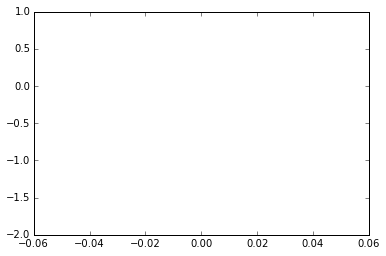

In [5]:
enet = sklearn.linear_model.ElasticNet(max_iter=10000, l1_ratio=.05)
enet.fit(X_train, y_train)
train_errors = list()
test_errors = list()
train_errors.append(enet.score(X_train, y_train))
test_errors.append(enet.score(X_test, y_test))

plt.plot(range(len(train_errors)), train_errors, range(len(test_errors)), test_errors)
print range(len(train_errors)), train_errors
print range(len(test_errors)), test_errors